In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [10]:
df = pd.read_csv('play_decision_data.csv')

In [11]:
df

,Day,outlook,temp,humidity,windy,play
0,1,sunny,hot,high,False,no
1,2,sunny,hot,high,True,no
2,3,overcast,hot,high,False,yes
3,4,rainy,mild,high,False,yes
4,5,rainy,cool,normal,False,yes
5,6,rainy,cool,normal,True,no
6,7,overcast,cool,normal,True,yes
7,8,sunny,mild,high,False,no
8,9,sunny,cool,normal,False,yes
9,10,rainy,mild,normal,False,yes


In [12]:
df['outlook'].unique()

array(['sunny', 'overcast', 'rainy'], dtype=object)

In [13]:
df['temp'].unique()

array(['hot', 'mild', 'cool'], dtype=object)

In [14]:
df['humidity'].unique()

array(['high', 'normal'], dtype=object)

In [15]:
df['windy'].unique()

array([False,  True])

In [16]:
outlook_map = {
    'sunny': 0,
    'overcast': 1,
    'rainy': 2
}

temp_map = {
    'hot': 0,
    'mild': 1,
    'cool': 2
}

humidity_map = {
    'high': 0,
    'normal': 1
}

windy_map = {
    False: 0,
    True: 1
}

In [17]:
df['outlook'] = df['outlook'].map(outlook_map)
df['temp'] = df['temp'].map(temp_map)
df['humidity'] = df['humidity'].map(humidity_map)
df['windy'] = df['windy'].map(windy_map)
df

,Day,outlook,temp,humidity,windy,play
0,1,0,0,0,0,no
1,2,0,0,0,1,no
2,3,1,0,0,0,yes
3,4,2,1,0,0,yes
4,5,2,2,1,0,yes
5,6,2,2,1,1,no
6,7,1,2,1,1,yes
7,8,0,1,0,0,no
8,9,0,2,1,0,yes
9,10,2,1,1,0,yes


In [18]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['play']=le.fit_transform(df['play'])

In [19]:
df

,Day,outlook,temp,humidity,windy,play
0,1,0,0,0,0,0
1,2,0,0,0,1,0
2,3,1,0,0,0,1
3,4,2,1,0,0,1
4,5,2,2,1,0,1
5,6,2,2,1,1,0
6,7,1,2,1,1,1
7,8,0,1,0,0,0
8,9,0,2,1,0,1
9,10,2,1,1,0,1


In [20]:
X = df.iloc[:, 1:-1]

In [21]:
y = df.iloc[:,-1]

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3)

In [26]:
X_train

,outlook,temp,humidity,windy
8,0,2,1,0
11,1,1,0,1
4,2,2,1,0
6,1,2,1,1
2,1,0,0,0
12,1,0,1,0
1,0,0,0,1
7,0,1,0,0
3,2,1,0,0


In [27]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=2)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

[Text(0.6, 0.8333333333333334, 'x[0] <= 0.5\ngini = 0.346\nsamples = 9\nvalue = [2, 7]'),
 Text(0.4, 0.5, 'x[1] <= 1.5\ngini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(0.5, 0.6666666666666667, 'True  '),
 Text(0.2, 0.16666666666666666, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.6, 0.16666666666666666, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.8, 0.5, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]'),
 Text(0.7, 0.6666666666666667, '  False')]

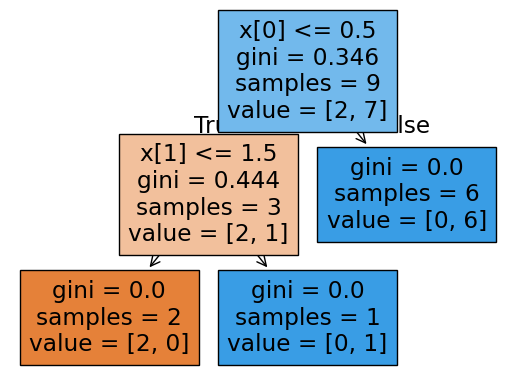

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(5,5))
plot_tree(dt, filled=True)

In [29]:
pred = dt.predict([[1,1,0,0]])

c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [30]:
print(pred)

[1]
